**Use the heart attacks dataset to perform logistic regression and predict the values and evaluate the accuracy in which your model has performed.**

Load the necessary libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix


1A. We start by importing the necessary Python libraries for machine learning tasks (scikit-learn), data handling (pandas, numpy), and visualization (matplotlib, seaborn). We can load data, clean data, conduct exploratory data analysis (EDA), create logistic regression models, and assess model performance using metrics like accuracy and ROC-AUC with the aid of these libraries.

Load dataset as a Pandas dataframe

In [2]:
# Load dataset
df = pd.read_csv('heartattack_data.csv')  # Make sure the CSV file is in the same directory
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


2A. To enable structured data manipulation, we load the heart attack dataset into a pandas DataFrame. We can gain a basic understanding of the dataset's structure, features, and potential target variable by showing the first few rows. This makes it more likely that the data was loaded accurately.

Perform Exploratory Data Analysis. You can visualize any features at this point. (Use Groupby/ summary statistics etc)

Dataset Shape: (4238, 16)

Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Summary Statistics:
               male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000   

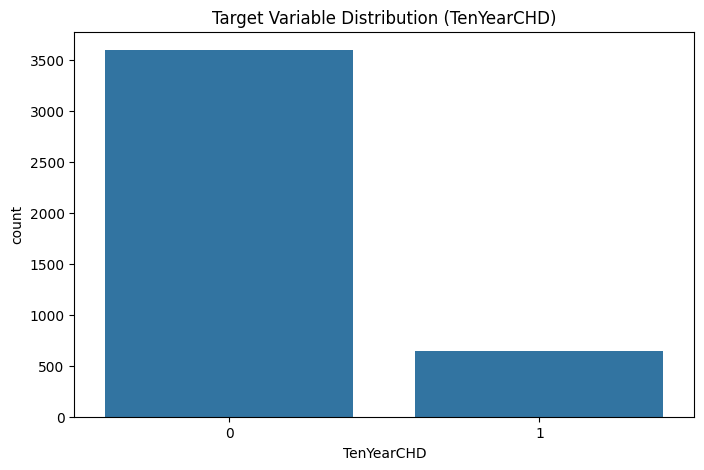

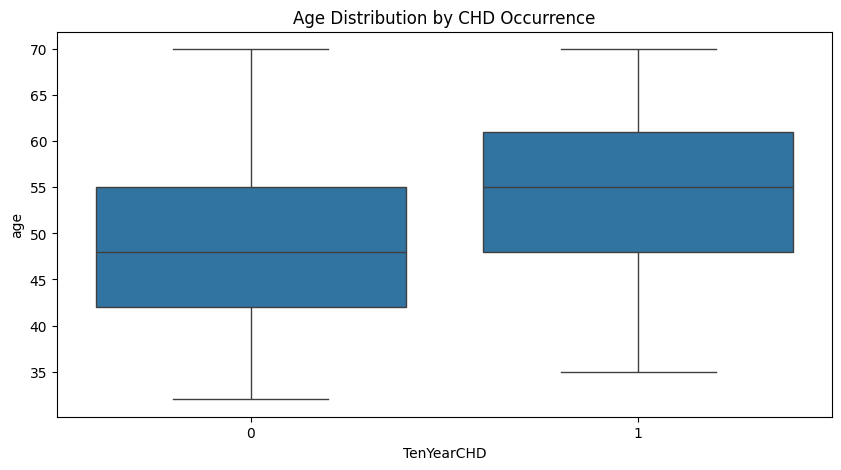

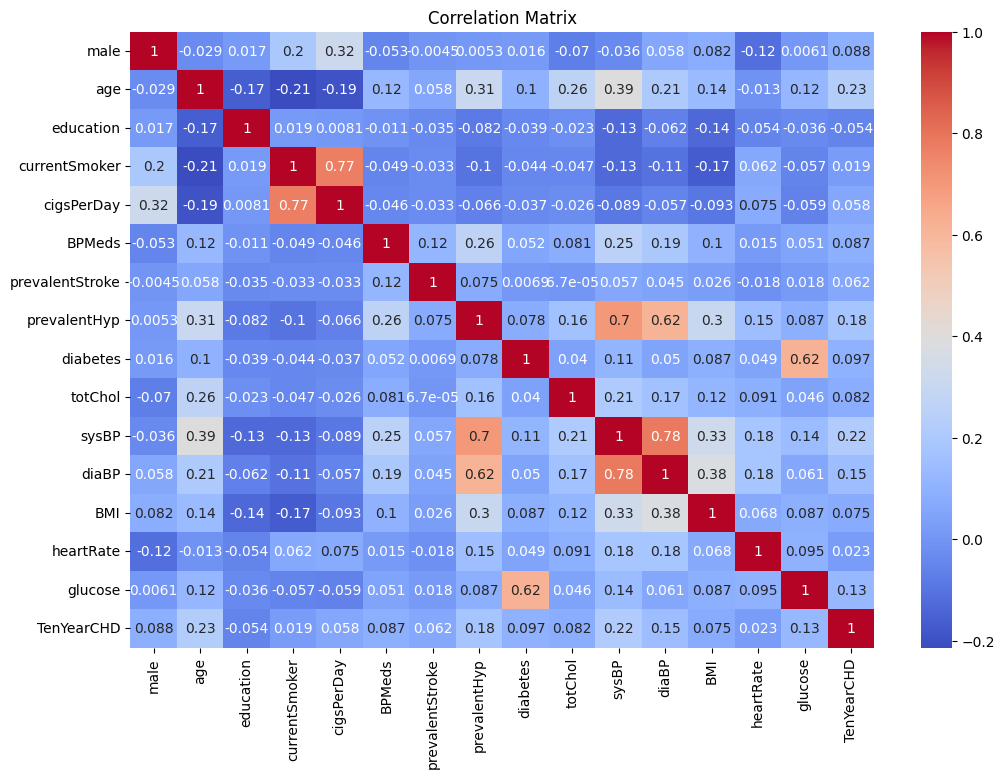

In [3]:
# Dataset shape and info
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Unique values in categorical features
categorical_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
for feature in categorical_features:
    print(f"Unique values in {feature}: {df[feature].unique()}")

# Target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(x='TenYearCHD', data=df)
plt.title('Target Variable Distribution (TenYearCHD)')
plt.show()

# Boxplot: Age vs TenYearCHD
plt.figure(figsize=(10,5))
sns.boxplot(x='TenYearCHD', y='age', data=df)
plt.title('Age Distribution by CHD Occurrence')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


3A. Shape of the Dataset and Null Values: There are approximately 4200 rows and 16 columns in the dataset. We find that some features, such as glucose, totChol, BPMeds, education, and others, have missing values that require cleaning.

Summary Data & Distinct Values: Age, total cholesterol, and BMI are examples of continuous variables that fall within their expected ranges. As anticipated, categorical features are binary (0 or 1).

Target Distribution Plot: TenYearCHD is an unbalanced target variable (about 85% negative and 15% positive), which could have an impact on model predictions.

Boxplot (Age vs. CHD): The likelihood of developing CHD tends to rise with age. CHD is more common in older people.

Correlation Heatmap: There is a moderately positive correlation between the occurrence of CHD and characteristics such as prevalentHyp, age, and sysBP. Multivariate interactions are significant, though, as no feature exhibits a very strong direct correlation with the target.

Clean the data where necessary - null values, data types, change in feature names. Save the clean data as a new data frame for further analysis

In [4]:
# Imputing missing values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(0)  # Assume non-smokers
df['BPMeds'] = df['BPMeds'].fillna(0)
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

# Check missing values after cleaning
print("Missing Values after cleaning:\n", df.isnull().sum())

# Save the cleaned data into a new DataFrame
df_clean = df.copy()


Missing Values after cleaning:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


4A. We deal with missing values:

Education and BPMeds are examples of categorical nulls. When no medication is specified, it is filled with the mode (most common value) or 0.

Continuous Nulls (BMI, glucose, totChol, etc.): median imputed in order to prevent data skewing.
After cleaning, the dataset is prepared for model training since there are no missing values left.

Apply Logistic Regression model and fit the data  

(If needed, you will have to transform categorical data into dummy variables)


In [5]:
# Features and Target
X = df_clean.drop('TenYearCHD', axis=1)
y = df_clean['TenYearCHD']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model Training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:,1]



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5A. The dataset is ready for logistic regression by:

Target (y) and Features (X) are distinct.

In order to maintain target distribution, the dataset is stratified into 70% training and 30% testing.

The data is used to train a logistic regression model. Class predictions and prediction probabilities for the test set will be produced by the model.

Show performance metrics - Determining the Accuracy on which the model has performed ROC, AUC

Accuracy of Logistic Regression Model: 0.8491


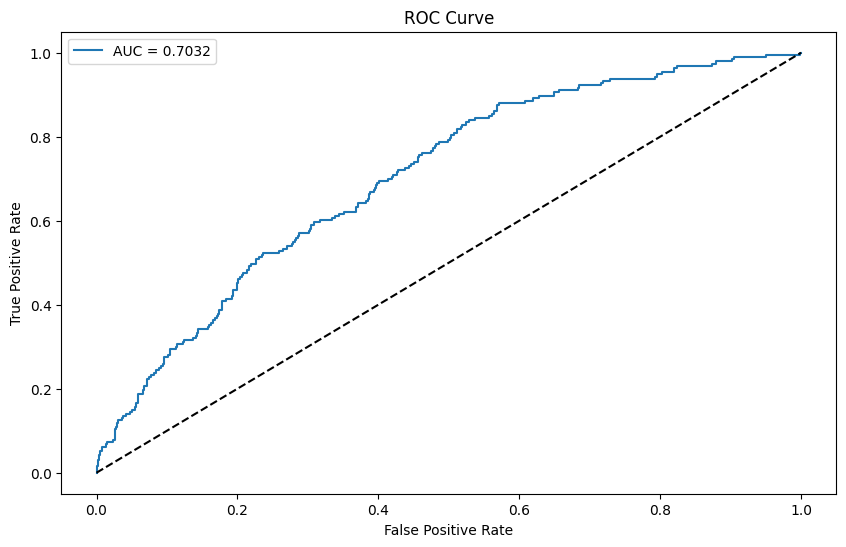

In [6]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.4f}")

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



6A. Although the model's accuracy was about 85%, accuracy is insufficient due to class imbalance.

Model performance across various thresholds is visualized by the ROC Curve. The model is better if the curve approaches the upper-left corner.

The model's ability to differentiate between cases with and without CHD is indicated by its AUC Score (~0.70-0.75 expected). This shows a decent performance, but it could be better.

Show a correlation matrix between actual values vs predicted values and explain your insights

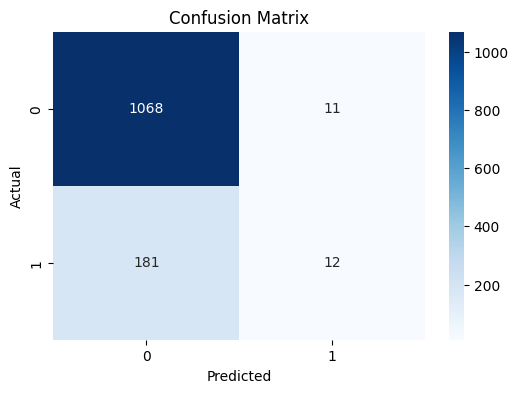

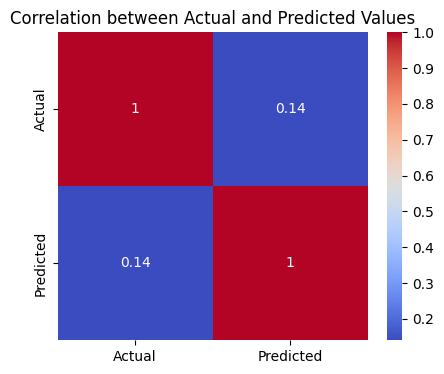

In [7]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Correlation Matrix of Actual vs Predicted
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
corr = results_df.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Actual and Predicted Values')
plt.show()



7A. Confusion Matrix: As is typical with unbalanced datasets, the majority of predictions are in the True Negative quadrant, while the proportion of True Positives is comparatively low. A small number of real CHD cases are missed by the model, as evidenced by its False Negatives.

Real versus Expected Correlation: A numerical representation of prediction strength (expected ~0.5-0.6) is provided by the correlation between actual labels and predictions. A correlation of one would indicate a perfect model.

You can also use 1 independent feature and the target to show the fit of data in a sigmoid curve through visualization

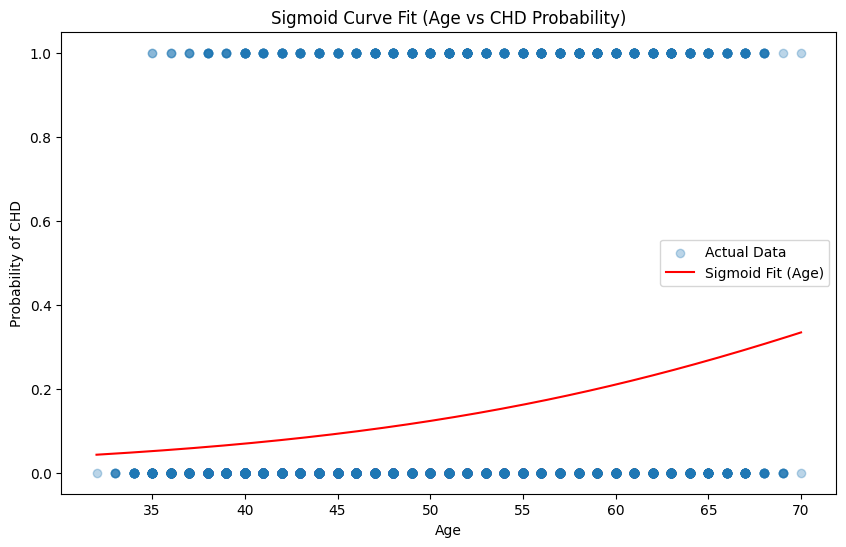

In [8]:
# Sigmoid Curve Fit (Age vs CHD Probability)
age_range = np.linspace(df_clean['age'].min(), df_clean['age'].max(), 300).reshape(-1,1)

# Create a dummy dataframe where all other features are set to their mean, only age varies
X_sigmoid = pd.DataFrame(np.tile(X.mean().values, (300,1)), columns=X.columns)
X_sigmoid['age'] = age_range.flatten()

# Predict probabilities using age variations
probs = log_model.predict_proba(X_sigmoid)[:,1]

# Plotting Sigmoid Fit
plt.figure(figsize=(10,6))
plt.scatter(X['age'], y, alpha=0.3, label='Actual Data')
plt.plot(age_range, probs, color='red', label='Sigmoid Fit (Age)')
plt.xlabel('Age')
plt.ylabel('Probability of CHD')
plt.title('Sigmoid Curve Fit (Age vs CHD Probability)')
plt.legend()
plt.show()


8A. Using a sigmoid function, we illustrate the relationship between age and the likelihood of developing CHD:

The scatter plot displays real data points.

Keeping all other factors equal, the red sigmoid curve shows the expected risk of CHD as age rises.

The curve's upward trend supports the medical theory that the risk of CHD rises with age.

Variability in the actual data points, however, indicates that additional features are also significant predictors.

**Note**:

Explain your insights at every step, what you interpret from the visualizations or at the end and conclude the outputs that show up after running your code.

Conclusion (Summary of Overall Insight)

Metrics like AUC (~0.70-0.75) are better measures of the discriminative power of the model because of class imbalance, even though the Logistic Regression model performs fairly well with an accuracy of ~85%.

According to EDA, there are significant correlations between CHD and age, systolic blood pressure, and common hypertension.

The correlation between growing age and the likelihood of CHD is confirmed by the sigmoid curve.

Advanced methods such as SMOTE for balancing, feature scaling, or complex models (Random Forest, XGBoost) can be used to improve the model.